# Propuesta de visualizaciones:

1. [Evolución de duración media de viaje (2018–2025)][1]
2. Distribución de motivos de viaje
3. Mapa de calor: motivos de viaje por comunidad (rural vs ciudad)
4. Comparativa gasto medio turista "nuevo modelo de viaje" vs general (por ejemplo, nómadas digitales vs familias)
5. Línea temporal: turismo experiencial vs tradicional

[1] Ver si hay datos disponibles e 2025 o tan solo hasta 2024.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Evolución tipo de visitantes (excursionistas vs turistas) por CCAA

In [45]:
visitantes_ccaa = pd.read_csv("./exports/visitantes_ccaa.csv")

/var/folders/1b/52_7kkd1249dzhl0d15c5dfc0000gn/T/ipykernel_1164/4044113362.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


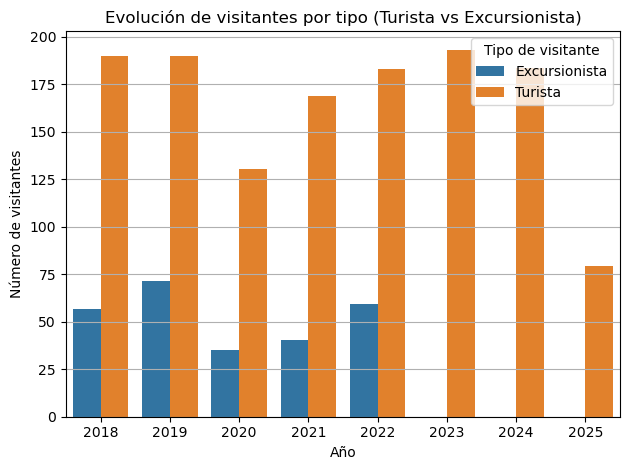

In [46]:
sns.barplot(
    data=visitantes_ccaa,
    x="AÑO",
    y="TOTAL",
    hue="TIPO_VISITANTE_GROUP",
    ci=None
)

plt.title("Evolución de visitantes por tipo (Turista vs Excursionista)")
plt.xlabel("Año")
plt.ylabel("Número de visitantes")
plt.legend(title="Tipo de visitante")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/var/folders/1b/52_7kkd1249dzhl0d15c5dfc0000gn/T/ipykernel_1164/1209380977.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


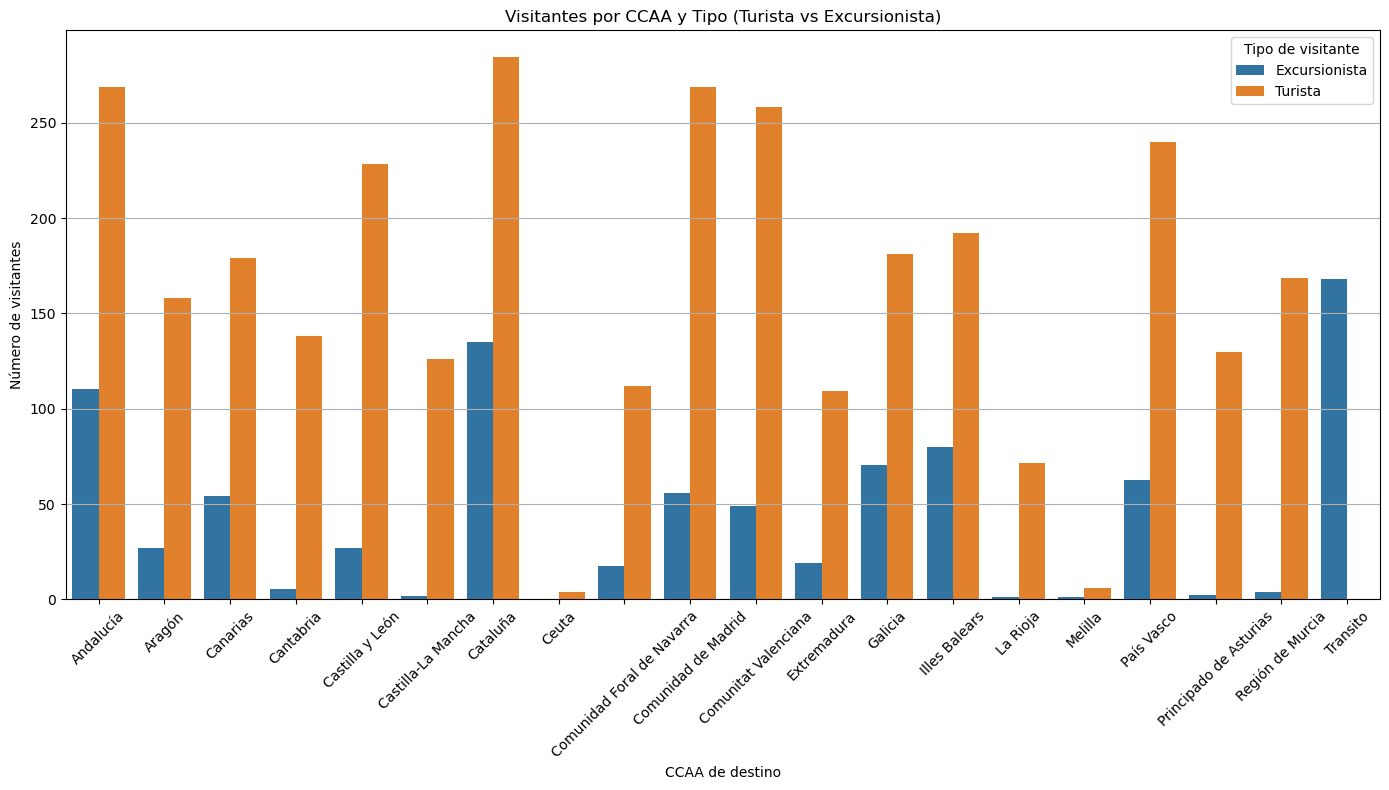

In [47]:
plt.figure(figsize = (14, 8))
sns.barplot(
    data=visitantes_ccaa,
    x="CCAA_DESTINO",
    y="TOTAL",
    hue="TIPO_VISITANTE_GROUP",
    ci=None
)

plt.title("Visitantes por CCAA y Tipo (Turista vs Excursionista)")
plt.xlabel("CCAA de destino")
plt.ylabel("Número de visitantes")
plt.xticks(rotation=45)
plt.legend(title="Tipo de visitante")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [48]:
top_ccaa = (visitantes_ccaa.groupby("CCAA_DESTINO")["TOTAL"].sum().nlargest(10).index)
data_top_ccaa=visitantes_ccaa[visitantes_ccaa["CCAA_DESTINO"].isin(top_ccaa)]

/var/folders/1b/52_7kkd1249dzhl0d15c5dfc0000gn/T/ipykernel_1164/2899001065.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


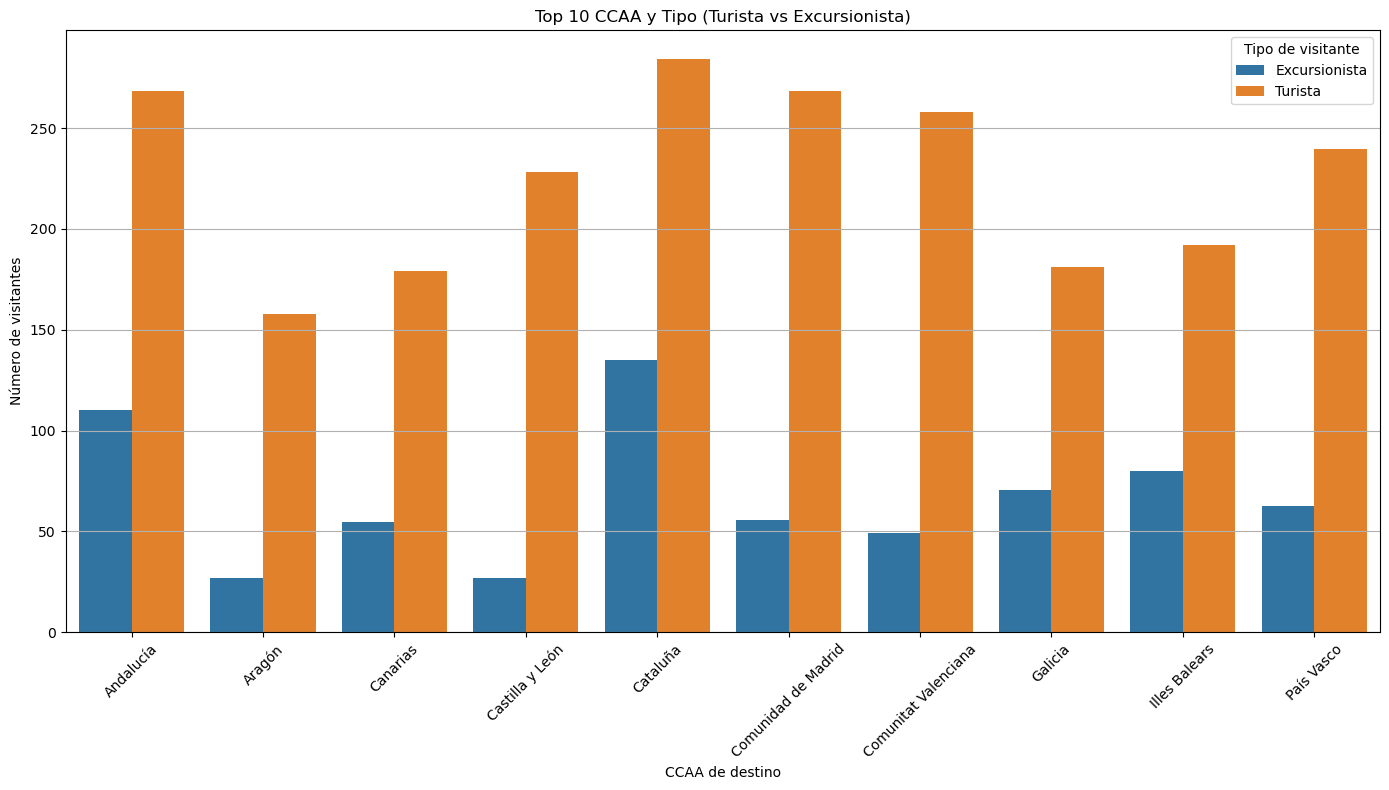

In [49]:
plt.figure(figsize = (14, 8))
sns.barplot(
    data=data_top_ccaa,
    x="CCAA_DESTINO",
    y="TOTAL",
    hue="TIPO_VISITANTE_GROUP",
    ci=None
)

plt.title("Top 10 CCAA y Tipo (Turista vs Excursionista)")
plt.xlabel("CCAA de destino")
plt.ylabel("Número de visitantes")
plt.xticks(rotation=45)
plt.legend(title="Tipo de visitante")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

/var/folders/1b/52_7kkd1249dzhl0d15c5dfc0000gn/T/ipykernel_1164/416783840.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


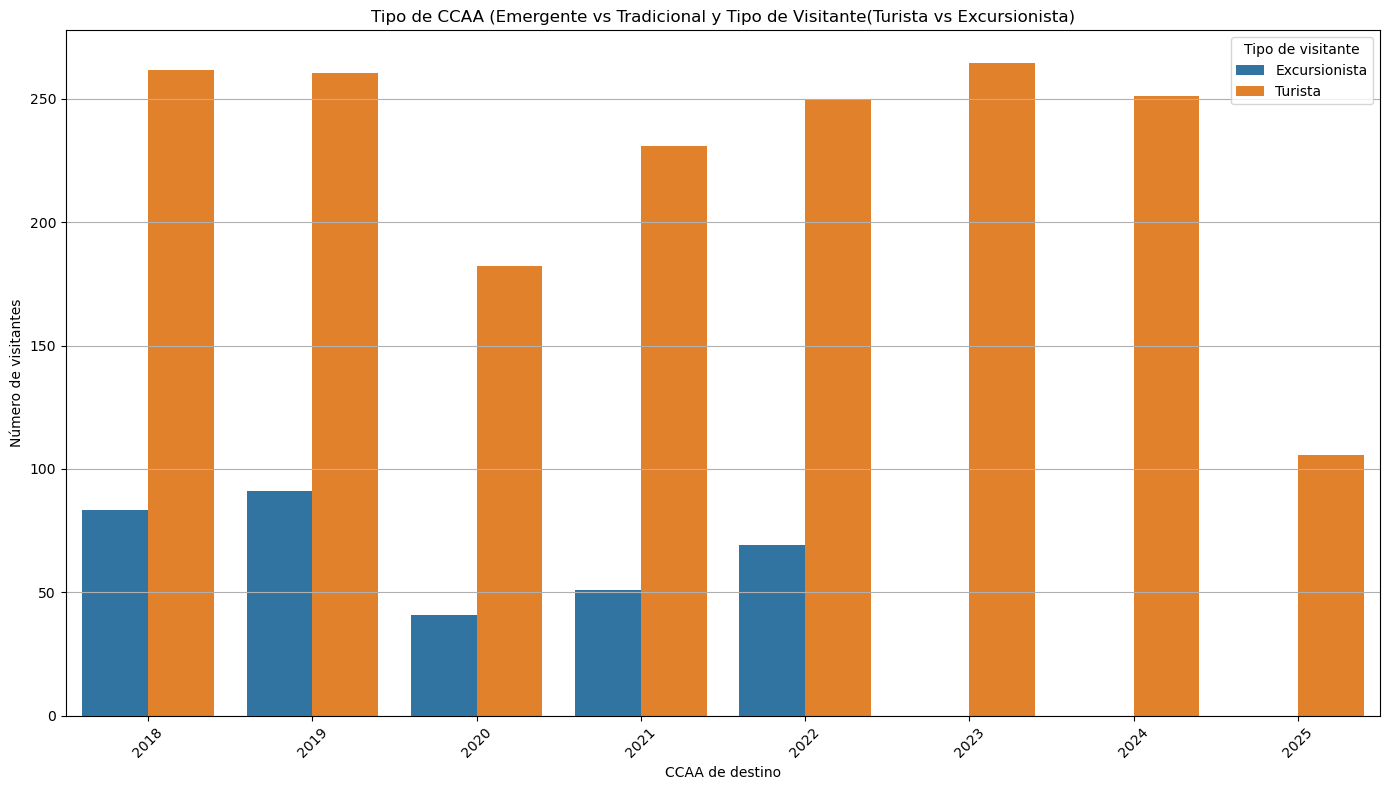

In [52]:
plt.figure(figsize = (14, 8))
sns.barplot(
    data=data_top_ccaa,
    x="AÑO",
    y="TOTAL",
    hue="TIPO_VISITANTE_GROUP",
    ci=None
)

plt.title("Tipo de CCAA (Emergente vs Tradicional y Tipo de Visitante(Turista vs Excursionista)")
plt.xlabel("CCAA de destino")
plt.ylabel("Número de visitantes")
plt.xticks(rotation=45)
plt.legend(title="Tipo de visitante")
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [57]:
visitantes_ccaa_pivot = pd.read_csv("./exports/visitantes_ccaa_pivot.csv")

In [58]:
pivot_table = visitantes_ccaa_pivot.pivot_table(
    index="AÑO",
    columns=["TIPO_VISITANTE_GROUP", "TIPO_CCAA"],
    values="TOTAL"
)

pivot_table

TIPO_VISITANTE_GROUP Excursionista                      Turista          \
TIPO_CCAA                Emergente   Otra Tradicional Emergente    Otra   
AÑO                                                                       
2018                         230.0  349.0       498.0    1275.0  1268.0   
2019                         268.0  353.0       519.0    1317.0  1244.0   
2020                         157.0  226.0       214.0     875.0   846.0   
2021                         185.0  257.0       288.0    1181.0  1094.0   
2022                         216.0  298.0       379.0    1242.0  1205.0   
2023                           NaN    NaN         NaN    1363.0  1229.0   
2024                           NaN    NaN         NaN    1251.0  1208.0   
2025                           NaN    NaN         NaN     507.0   483.0   

TIPO_VISITANTE_GROUP              
TIPO_CCAA            Tradicional  
AÑO                               
2018                      1070.0  
2019                      1051.0  
2020                       753.0  
2021                       934.0  
2022                      1031.0  
2023                      1080.0  
2024                      1030.0  
2025                       440.0

In [60]:
valores = pivot_table.loc[2018:2022].values  # solo hasta 2022
columnas = pivot_table.columns

crecimiento_porcentaje = ((valores[-1] - valores[0]) / valores[0]) * 100

for i, col in enumerate(columnas):
    tipo, ccaa = col
    print(f"{tipo} en CCAA {ccaa}: {crecimiento_porcentaje[i]:.2f}% de crecimiento entre 2018 y 2022")


Excursionista en CCAA Emergente: -6.09% de crecimiento entre 2018 y 2022
Excursionista en CCAA Otra: -14.61% de crecimiento entre 2018 y 2022
Excursionista en CCAA Tradicional: -23.90% de crecimiento entre 2018 y 2022
Turista en CCAA Emergente: -2.59% de crecimiento entre 2018 y 2022
Turista en CCAA Otra: -4.97% de crecimiento entre 2018 y 2022
Turista en CCAA Tradicional: -3.64% de crecimiento entre 2018 y 2022


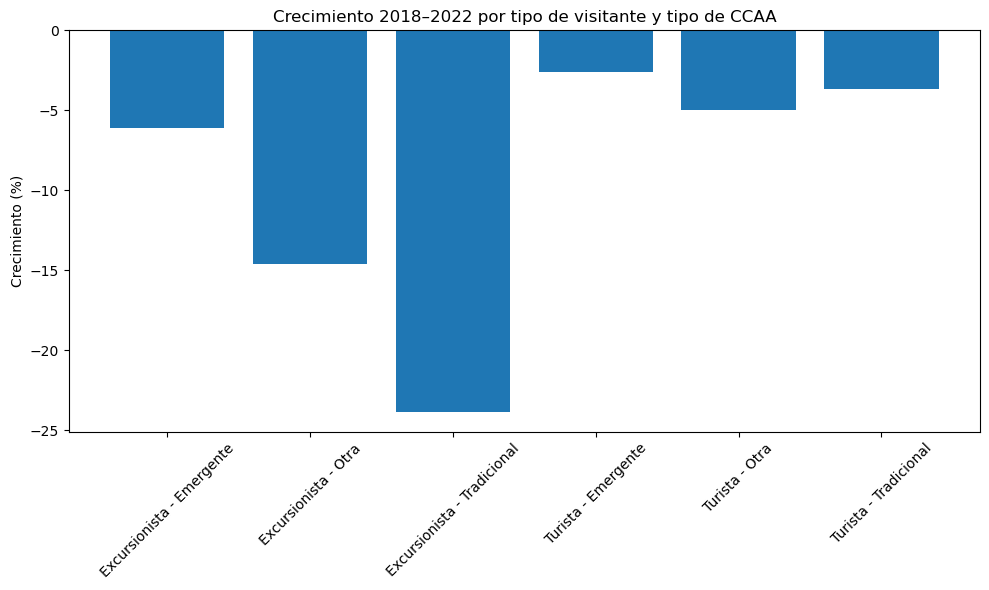

In [63]:
labels = [f"{t} - {c}" for t, c in columnas]
plt.figure(figsize=(10,6))
plt.bar(labels, crecimiento_porcentaje)
plt.xticks(rotation=45)
plt.ylabel("Crecimiento (%)")
plt.title("Crecimiento 2018–2022 por tipo de visitante y tipo de CCAA")
plt.tight_layout()
plt.show()


In [ ]:
# Actividades de ocio por CCAA

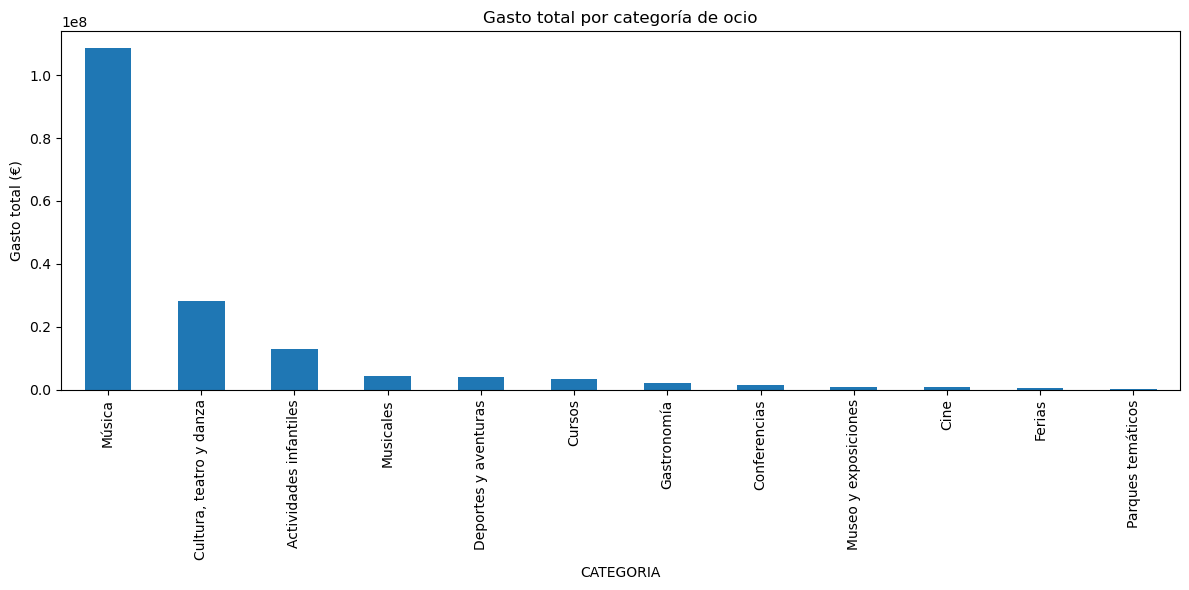

In [70]:
actividades_ocio = pd.read_csv("./exports/actividades_ocio")
top_categorias = actividades_ocio.groupby("CATEGORIA")["GASTO_TOTAL"].sum().sort_values(ascending=False)

top_categorias.plot(kind="bar", figsize=(12,6), title="Gasto total por categoría de ocio")
plt.ylabel("Gasto total (€)")
plt.tight_layout()
plt.show()

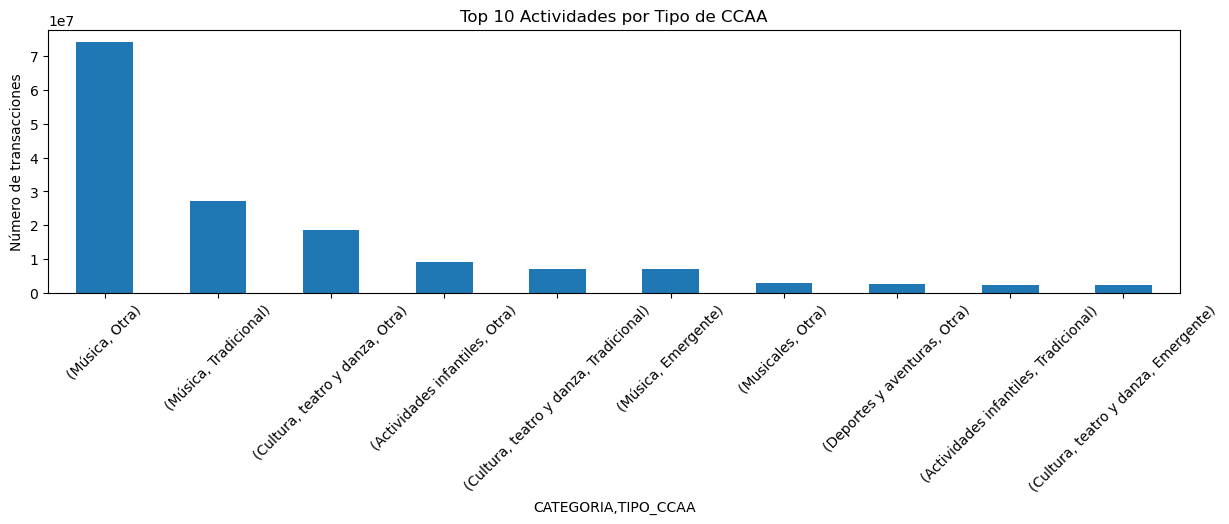

In [76]:
top_tipo_ccaa = actividades_ocio.groupby(["CATEGORIA", "TIPO_CCAA"])["GASTO_TOTAL"].sum().sort_values(ascending=False).head(10)

top_tipo_ccaa.plot(kind="bar", figsize=(12,6), title="Top 10 Actividades por Tipo de CCAA")
plt.ylabel("Número de transacciones")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

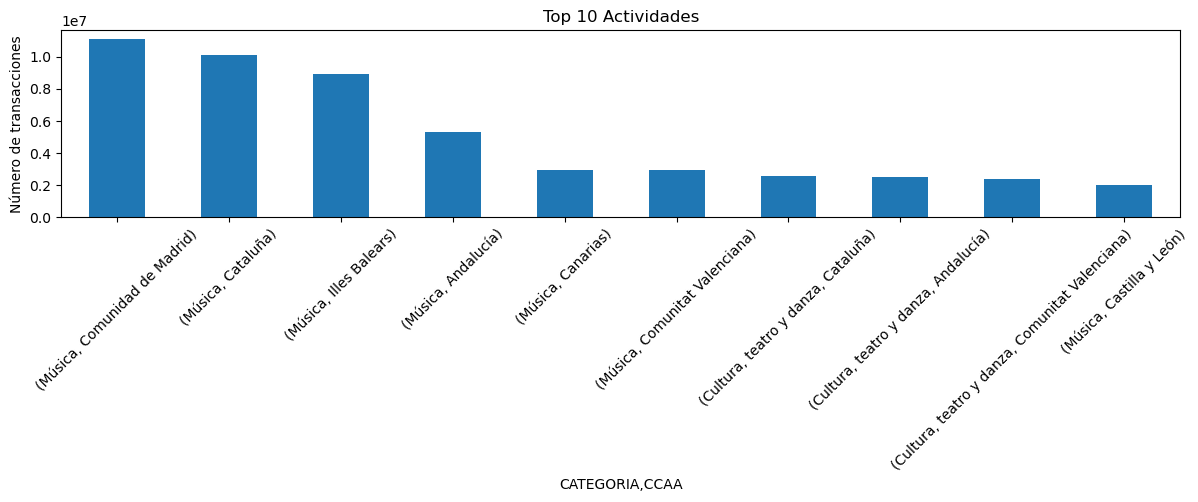

In [84]:
actividades_ocio_filtrado = actividades_ocio[actividades_ocio["CCAA"] != "Total Nacional"]
top_ccaa = actividades_ocio_filtrado.groupby(["CATEGORIA", "CCAA"])["GASTO_TOTAL"].sum().sort_values(ascending=False).head(10)

top_ccaa.plot(kind="bar", figsize=(12,6), title="Top 10 Actividades")
plt.ylabel("Número de transacciones")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()